<a href="https://colab.research.google.com/github/Raman-Dhillon/Air-Pollution-Classification-Using-Deep-Learning/blob/main/redwinequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
wine = pd.read_csv("/content/winequality-red.csv")
wine.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
1513,6.4,0.560,0.15,1.80,0.078,17.0,65.0,0.99294,3.33,0.60,10.50,6
1456,6.0,0.540,0.06,1.80,0.050,38.0,89.0,0.99236,3.30,0.50,10.55,6
608,10.1,0.650,0.37,5.10,0.110,11.0,65.0,1.00260,3.32,0.64,10.40,6
285,9.9,0.590,0.07,3.40,0.102,32.0,71.0,1.00015,3.31,0.71,9.80,5
283,8.9,0.400,0.32,5.60,0.087,10.0,47.0,0.99910,3.38,0.77,10.50,7
1135,8.0,0.250,0.43,1.70,0.067,22.0,50.0,0.99460,3.38,0.60,11.90,6
1069,8.0,0.620,0.35,2.80,0.086,28.0,52.0,0.99700,3.31,0.62,10.80,5
1278,8.0,0.715,0.22,2.30,0.075,13.0,81.0,0.99688,3.24,0.54,9.50,6
1162,8.5,0.320,0.42,2.30,0.075,12.0,19.0,0.99434,3.14,0.71,11.80,7


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


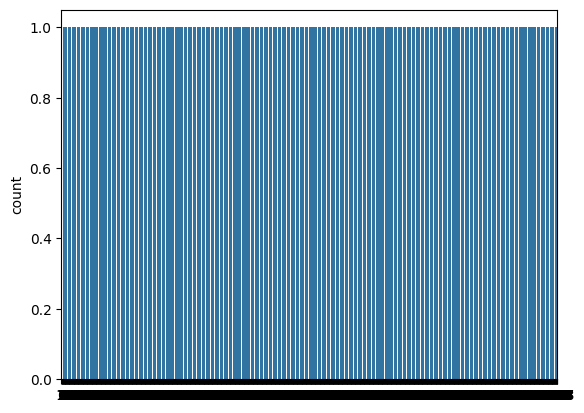

In [7]:
sns.countplot(wine['quality'])
plt.show()

,0
fixed acidity,"Axes(0.125,0.712609;0.168478x0.167391)"
volatile acidity,"Axes(0.327174,0.712609;0.168478x0.167391)"
citric acid,"Axes(0.529348,0.712609;0.168478x0.167391)"
residual sugar,"Axes(0.731522,0.712609;0.168478x0.167391)"
chlorides,"Axes(0.125,0.511739;0.168478x0.167391)"
free sulfur dioxide,"Axes(0.327174,0.511739;0.168478x0.167391)"
total sulfur dioxide,"Axes(0.529348,0.511739;0.168478x0.167391)"
density,"Axes(0.731522,0.511739;0.168478x0.167391)"
pH,"Axes(0.125,0.31087;0.168478x0.167391)"
sulphates,"Axes(0.327174,0.31087;0.168478x0.167391)"


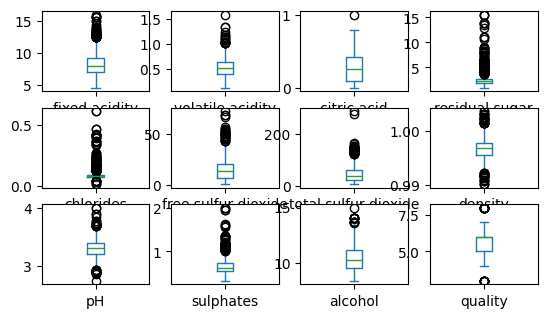

In [8]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

<Axes: >

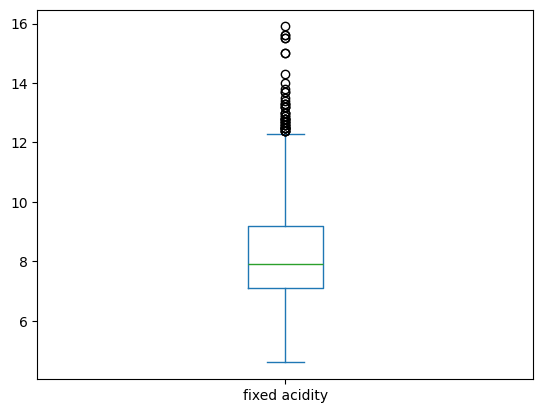

In [9]:
wine['fixed acidity'].plot(kind ='box')

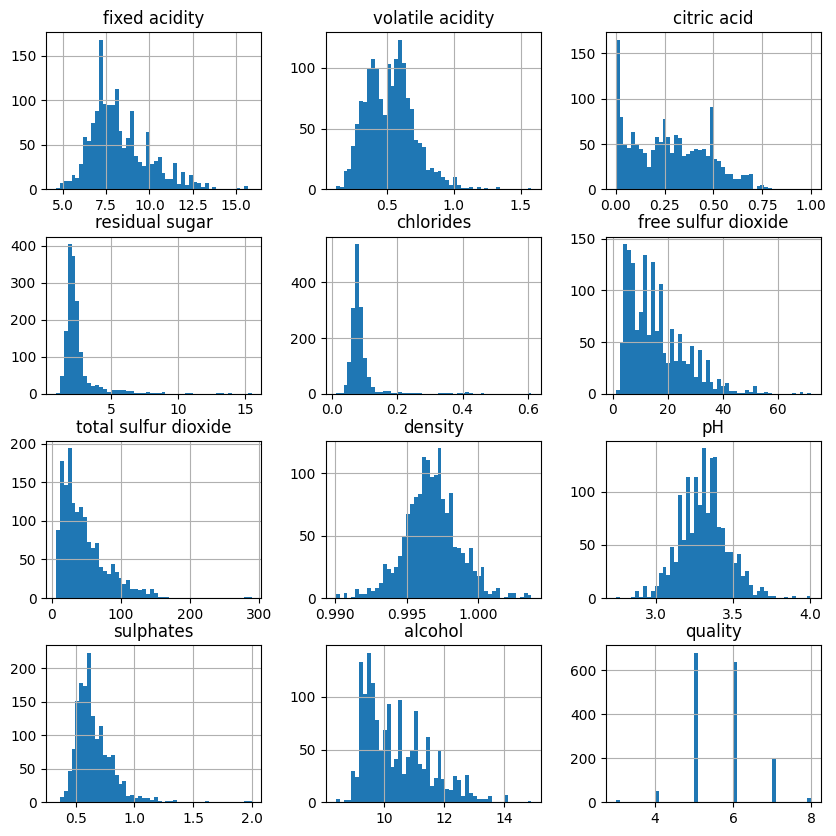

In [10]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

In [11]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
171,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.9972,3.29,0.61,9.2,6
773,7.9,0.40,0.29,1.8,0.157,1.0,44.0,0.9973,3.30,0.92,9.5,6
95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
134,7.9,1.04,0.05,2.2,0.084,13.0,29.0,0.9959,3.22,0.55,9.9,6
323,10.3,0.59,0.42,2.8,0.090,35.0,73.0,0.9990,3.28,0.70,9.5,6


In [12]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
# If wine quality is 7 or above then will consider as good quality wine
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
295,10.8,0.50,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,5,0
613,8.2,0.39,0.38,1.5,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5,0
808,7.4,0.53,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,5,0
609,6.3,0.36,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7,6,0
685,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,5,0


In [14]:
# See total number of good vs bad wines samples
wine['goodquality'].value_counts()

,count
goodquality,
0,1382
1,217


In [15]:
# Separate depedent and indepedent variables
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


In [18]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07546785 0.10400847 0.09094661 0.07664058 0.06495111 0.0680936
 0.0838918  0.08420337 0.06857464 0.1110512  0.17217077]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [20]:
model_res=pd.DataFrame(columns=['Model', 'Score'])

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
# accuracy_score(Y_test,Y_pred)
model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.872917


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['KNeighborsClassifier', accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917


In [23]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['SVC', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.86875


,Model,Score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750


In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['DecisionTreeClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.8645833333333334


,Model,Score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583


In [25]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['GaussianNB', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.8333333333333334


,Model,Score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333


In [26]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.89375


,Model,Score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333
5,RandomForestClassifier,0.893750


In [27]:
!pip install xgboost

In [28]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['XGBClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.89375


,Model,Score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333
5,RandomForestClassifier,0.893750
6,XGBClassifier,0.893750


In [29]:
model_res = model_res.sort_values(by='Score', ascending=False)
model_res

,Model,Score
6,XGBClassifier,0.893750
5,RandomForestClassifier,0.893750
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.833333
